In [28]:
import pandas as pd
import os

base_path = "~/Downloads/experiments_a"
df_baseline = pd.read_csv(os.path.join(base_path, "lora/metrics.csv"))
df_ours = pd.read_csv(os.path.join(base_path, "fabric/metrics.csv"))
df_ours_fst = pd.read_csv(os.path.join(base_path, "fabric_first_half/metrics.csv"))
df_ours_snd = pd.read_csv(os.path.join(base_path, "fabric_snd_half/metrics.csv"))

In [29]:
df_ours.keys()

Index(['round', 'prompt', 'prompt_idx', 'image_idx', 'image', 'hps', 'pos_sim',
       'neg_sim', 'seed', 'liked', 'disliked'],
      dtype='object')

In [30]:
baseline_min = df_baseline.groupby(["prompt_idx", "round"])["hps"].min().groupby("round").mean()
baseline_mean = df_baseline.groupby(["prompt_idx", "round"])["hps"].mean().groupby("round").mean()
baseline_max = df_baseline.groupby(["prompt_idx", "round"])["hps"].max().groupby("round").mean()

ours_min = df_ours.groupby(["prompt_idx", "round"])["hps"].min().groupby("round").mean()
ours_mean = df_ours.groupby(["prompt_idx", "round"])["hps"].mean().groupby("round").mean()
ours_max = df_ours.groupby(["prompt_idx", "round"])["hps"].max().groupby("round").mean()

ours_fst_min = df_ours_fst.groupby(["prompt_idx", "round"])["hps"].min().groupby("round").mean()
ours_fst_mean = df_ours_fst.groupby(["prompt_idx", "round"])["hps"].mean().groupby("round").mean()
ours_fst_max = df_ours_fst.groupby(["prompt_idx", "round"])["hps"].max().groupby("round").mean()

ours_snd_min = df_ours_snd.groupby(["prompt_idx", "round"])["hps"].min().groupby("round").mean()
ours_snd_mean = df_ours_snd.groupby(["prompt_idx", "round"])["hps"].mean().groupby("round").mean()
ours_snd_max = df_ours_snd.groupby(["prompt_idx", "round"])["hps"].max().groupby("round").mean()

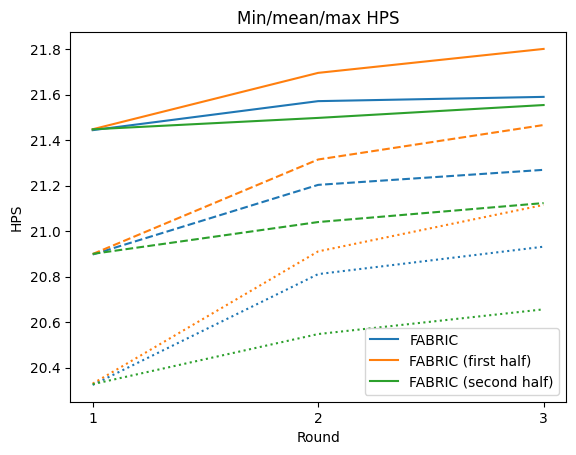

In [31]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.arange(len(baseline_min)) + 1

plt.plot(ts, ours_max, label="FABRIC", linestyle="solid", color="C0")
plt.plot(ts, ours_mean, linestyle="dashed", color="C0")
plt.plot(ts, ours_min, linestyle="dotted", color="C0")

plt.plot(ts, ours_fst_max, label="FABRIC (first half)", linestyle="solid", color="C1")
plt.plot(ts, ours_fst_mean, linestyle="dashed", color="C1")
plt.plot(ts, ours_fst_min, linestyle="dotted", color="C1")

plt.plot(ts, ours_snd_max, label="FABRIC (second half)", linestyle="solid", color="C2")
plt.plot(ts, ours_snd_mean, linestyle="dashed", color="C2")
plt.plot(ts, ours_snd_min, linestyle="dotted", color="C2")

# plt.plot(ts, baseline_max, label="HPS LoRA", linestyle="solid", color="C3")
# plt.plot(ts, baseline_mean, linestyle="dashed", color="C3")
# plt.plot(ts, baseline_min, linestyle="dotted", color="C3")

plt.xticks(ts)
plt.xlabel("Round")
plt.ylabel("HPS")
plt.legend(loc="lower right")
plt.title("Min/mean/max HPS")
plt.savefig("hps_per_round.png", dpi=300, bbox_inches="tight")

In [32]:
max_prompt_idx = min(df_baseline["prompt_idx"].max(), df_ours["prompt_idx"].max(), df_ours_fst["prompt_idx"].max(), df_ours_snd["prompt_idx"].max())
df_baseline = df_baseline.loc[df_baseline["prompt_idx"] <= max_prompt_idx]
df_ours = df_ours.loc[df_ours["prompt_idx"] <= max_prompt_idx]
df_ours_fst = df_ours_fst.loc[df_ours_fst["prompt_idx"] <= max_prompt_idx]
df_ours_snd = df_ours_snd.loc[df_ours_snd["prompt_idx"] <= max_prompt_idx]
max_prompt_idx

303

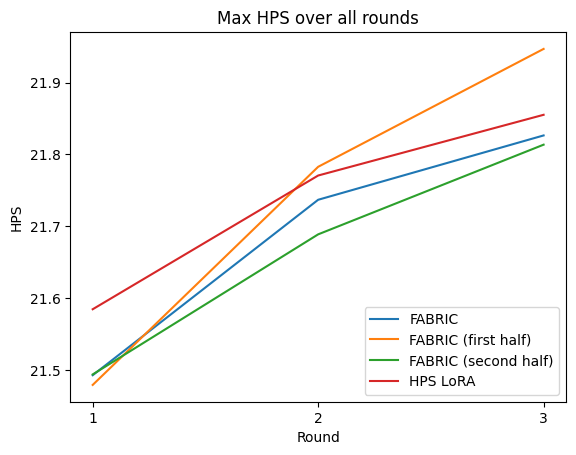

In [33]:
baseline_glob_max = [df_baseline.loc[df_baseline["round"] <= i].groupby(["prompt_idx"])["hps"].max().mean() for i in range(3)]
ours_fst_glob_max = [df_ours_fst.loc[df_ours_fst["round"] <= i].groupby(["prompt_idx"])["hps"].max().mean() for i in range(3)]
ours_snd_glob_max = [df_ours_snd.loc[df_ours_snd["round"] <= i].groupby(["prompt_idx"])["hps"].max().mean() for i in range(3)]
ours_glob_max = [df_ours.loc[df_ours["round"] <= i].groupby(["prompt_idx"])["hps"].max().mean() for i in range(3)]

ts = np.arange(len(baseline_min)) + 1
plt.plot(ts, ours_glob_max, label="FABRIC", linestyle="solid", color="C0")
plt.plot(ts, ours_fst_glob_max, label="FABRIC (first half)", linestyle="solid", color="C1")
plt.plot(ts, ours_snd_glob_max, label="FABRIC (second half)", linestyle="solid", color="C2")
plt.plot(ts, baseline_glob_max, label="HPS LoRA", linestyle="solid", color="C3")

plt.xticks(ts)
plt.xlabel("Round")
plt.ylabel("HPS")
plt.legend(loc="lower right")
plt.title("Max HPS over all rounds")
plt.savefig("max_hps.png", dpi=300, bbox_inches="tight")